# Plotting Weather Data



An NOAA dataset has been stored in the file . The data for this project comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

The data is from Bavaria, Germany and the specific weather stations from around Nuremberg/Bamberg are shown in the map below.
Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

## Weather Stations on a map:

In [73]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import calendar

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('geographic_data.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'bfe14210632e64039299ddcc066003f56ea8028e6330add7f394f009')

## Import used libraries:

In [74]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker

## Data Preparation:

General Setup:

In [75]:
wheater_data = pd.read_csv('weather_data.csv')
wheater_data['Data_Value'] *= 0.1
wheater_data['Date'] = pd.to_datetime(wheater_data['Date'])
wheater_data['Day'] = pd.DatetimeIndex(wheater_data['Date']).day
wheater_data['Month'] = pd.DatetimeIndex(wheater_data['Date']).month 
wheater_data['Year'] = pd.DatetimeIndex(wheater_data['Date']).year
wheater_data.set_index(['Month', 'Day'], inplace=True)
wheater_data.sort_index(inplace=True)
wheater_data.head()

ID       Date Element  Data_Value  Year
Month Day                                                  
1     1    GME00102380 2012-01-01    TMIN         4.4  2012
      1    GME00102380 2012-01-01    TMAX        10.9  2012
      1    GM000004063 2013-01-01    TMIN         1.4  2013
      1    GM000004063 2013-01-01    TMAX         7.7  2013
      1    GME00102380 2014-01-01    TMIN        -4.4  2014

Delete all columns of 29th of February:

In [76]:
dates_to_delete = wheater_data.loc[2, 29]
wheater_data = wheater_data[~wheater_data.index.isin(dates_to_delete.index)]

Create two DataFrames, one for 2004-2014, and one for 2015:

In [77]:
wheater_data_2015 = wheater_data[wheater_data['Year'] == 2015]
wheater_data_main = wheater_data[wheater_data['Year'] != 2015]                     

# 2004-2014

Create a DataFrame with only themaximum values and one with only the minimum values:

In [78]:
wheater_data_main_max = wheater_data_main[wheater_data_main['Element'] == 'TMAX']
wheater_data_main_min = wheater_data_main[wheater_data_main['Element'] == 'TMIN']

Create a DataFrame grouped by month and day and with the max value for each day from the maximum Data:

In [79]:
max_temp = wheater_data_main_max.groupby(level= ['Month', 'Day'])['Data_Value'].max()

Create a DataFrame grouped by month and day and with the min value for each day from the minimim Data:

In [80]:
min_temp = wheater_data_main_min.groupby(level= ['Month', 'Day'])['Data_Value'].min()

# 2015

Create a DataFrame with only themaximum values and one with only the minimum values:

In [81]:
wheater_data_2015_max = wheater_data_2015[wheater_data_2015['Element'] == 'TMAX']
wheater_data_2015_min = wheater_data_2015[wheater_data_2015['Element'] == 'TMIN']

In [82]:
max_temp_2015 = wheater_data_2015_max.groupby(level = ['Month', 'Day']).max()[['Data_Value', 'Date']]
min_temp_2015 = wheater_data_2015_min.groupby(level = ['Month', 'Day']).min()[['Data_Value', 'Date']]

# Plotting:

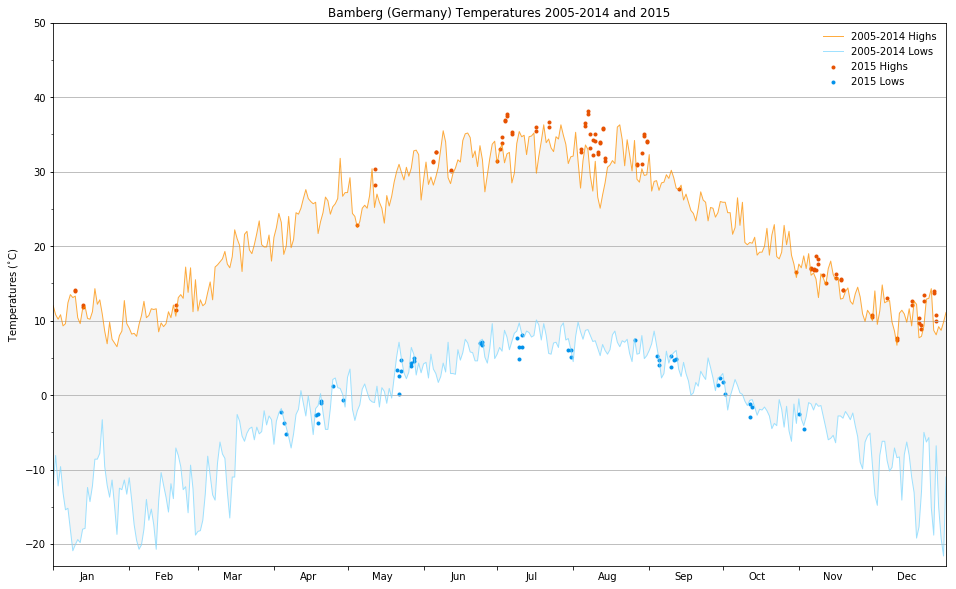

In [86]:
fig, ax = plt.subplots(figsize=(16,10))

#Create the x-axis of this figure: date_range
date_range = wheater_data_2015['Date'].unique()

plt.plot(date_range, max_temp.values, '#FF9100', linewidth = 1, alpha=0.75, label = '2005-2014 Highs')
plt.plot(date_range, min_temp.values, '#80D8FF', linewidth =1, alpha=0.75, label = '2005-2014 Lows')
plt.fill_between(date_range, min_temp, max_temp, facecolor='#EEEEEE', alpha=0.6)


ax.set_title('Bamberg (Germany) Temperatures 2005-2014 and 2015') # Setting the title
ax.yaxis.grid() # Setting up the horizontal grid lines in the background
ax.legend(loc=1).get_frame().set_edgecolor('white')

my_label_max = '2015 Highs'
my_label_min = '2015 Lows'

for idx, rows in wheater_data_2015_max.iterrows():
    if rows['Data_Value'] > max_temp.loc[idx]:
        plt.scatter(rows['Date'], rows['Data_Value'], c = '#E65100', marker = '.', label = my_label_max)
        my_label_max = "_nolegend_" # To avoid duplicate labels in the legend
for idx, rows in wheater_data_2015_min.iterrows():
    if rows['Data_Value'] < min_temp.loc[idx]:
        plt.scatter(rows['Date'], rows['Data_Value'], c = '#0091EA', marker = '.', label = my_label_min)
        my_label_min = "_nolegend_"
        
# Adding the labels for the max and min points to the above legend 
ax.legend(loc = 1).get_frame().set_edgecolor('white')

# Setting the limits for x-axis to fit the dates perfectly
xmin, xmax = date_range[0], date_range[-1]
ax.set_xlim(xmin, xmax)

# Locating 12 positions for the 15th of each month on x-axis 
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15))

# Labeling the 12 months on x-axis at the positions located above
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

# Centering month labels in between the ticks and removing undesirable ticks
xticks = ax.xaxis.get_minor_ticks()
for xtick in xticks:
    xtick.tick1line.set_markersize(0)
    xtick.tick2line.set_markersize(0)
    xtick.label1.set_horizontalalignment('center')
    

ax.set_ylabel('Temperatures $(^{\circ}$C)') # Set label for y-axis

# Setting the temperature limits for y-axis from -10 to 50 degrees Celsius
ymin, ymax = -23, 50
ax.set_ylim(ymin, ymax) 

yticks = ax.yaxis.get_major_ticks()
#yticks[1].label1.set_visible(False) # Making 50 degrees Celsius disappear to make the graph look cleaner
#yticks[8].label1.set_visible(False) # Making -10 degrees Celsius disappear to make the graph look cleaner
ax.yaxis.set_major_locator(ticker.MultipleLocator(10)) # Putting major ticks at every 10 degrees Celsius
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5)) # Putting minor ticks at every 5 degrees Celsius

In [84]:
fig.tight_layout() # To make the graph fit perfectly in the figure window

In [85]:
#fig.savefig('Bamberg (Germany) Temperatures 2005-2014 and 2015', bbox_inches='tight', pad_inches=0.001)